In [2330]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

#one hot encoding
from sklearn.preprocessing import OneHotEncoder
#linear regression model
from sklearn.linear_model import LinearRegression
#evalutate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# for QQ plot
import scipy.stats as stats
# evaluation on test data
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [2331]:
file_path = "\\Users\\eggfr\\Flatiron\\Flatiron_phase2_project\\dsc-phase-2-project\\data\\kc_house_data.csv"
project2_raw_df = pd.read_csv(file_path)

In [2332]:
project2_raw_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [2333]:
#rem_project2_raw_df =project2_raw_df
#rem_y = rem_project2_raw_df['price']
#rem_X= rem_project2_raw_df.drop('price',1)

In [2334]:
y = project2_raw_df['price']
X= project2_raw_df.drop('price',1)
X.shape

C:\Users\eggfr\AppData\Local\Temp\ipykernel_6552\2521427708.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= project2_raw_df.drop('price',1)


(21597, 20)

In [2335]:
#create train-test set using 75-25 (train-test and random state = 42) randomly split the data
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.25,random_state=42)
# shape of train and test splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16197, 20), (5400, 20), (16197,), (5400,))

In [2336]:
project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [2337]:
project2_raw_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [2338]:
project2_raw_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [2339]:
x_train['date'] = pd.to_datetime(x_train['date'])
x_train['month'] = x_train['date'].apply(lambda date:date.month)
x_train['year'] = x_train['date'].apply(lambda date:date.year)
x_train = x_train.drop('date',axis=1)

x_test['date'] = pd.to_datetime(x_test['date'])
x_test['month'] = x_test['date'].apply(lambda date:date.month)
x_test['year'] = x_test['date'].apply(lambda date:date.year)
x_test = x_test.drop('date',axis=1)

#x_test['date'] = pd.to_datetime(x_test['date'])
#x_test['month'] = x_test['date'].apply(lambda date:date.month)
#x_test['year'] = x_test['date'].apply(lambda date:date.year)
#x_test = x_test.drop('date',axis=1)
# Check the new columns
print(x_train.columns.values)

['id' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


In [2340]:
project2_raw_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [2341]:
# change the inproper datatype for 'sqft_basement'
x_train['sqft_basement'] = x_train['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_train['sqft_basement'] = x_train['sqft_basement'].apply(lambda x: float(x))
#x_train['sqft_basement'].dtype
x_test['sqft_basement'] = x_test['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_test['sqft_basement'] = x_test['sqft_basement'].apply(lambda x: float(x))



In [2342]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 3686 to 2358
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5400 non-null   int64  
 1   bedrooms       5400 non-null   int64  
 2   bathrooms      5400 non-null   float64
 3   sqft_living    5400 non-null   int64  
 4   sqft_lot       5400 non-null   int64  
 5   floors         5400 non-null   float64
 6   waterfront     4780 non-null   object 
 7   view           5386 non-null   object 
 8   condition      5400 non-null   object 
 9   grade          5400 non-null   object 
 10  sqft_above     5400 non-null   int64  
 11  sqft_basement  5400 non-null   float64
 12  yr_built       5400 non-null   int64  
 13  yr_renovated   4437 non-null   float64
 14  zipcode        5400 non-null   int64  
 15  lat            5400 non-null   float64
 16  long           5400 non-null   float64
 17  sqft_living15  5400 non-null   int64  
 18  sqft_

In [2343]:
project2_raw_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [2344]:
project2_raw_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [2345]:
#fill na with no value and change yes to 1 n no to 0 #since majority of the sales has no waterfront.
x_train['waterfront'] = x_train['waterfront'].fillna(value = 'NO')
x_train['waterfront'] = x_train['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
x_train['waterfront'].value_counts()


0    16086
1      111
Name: waterfront, dtype: int64

In [2346]:
x_test['waterfront'] = x_test['waterfront'].fillna(value = 'NO')
x_test['waterfront'] = x_test['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
x_test['waterfront'].value_counts()

0    5365
1      35
Name: waterfront, dtype: int64

In [2347]:
project2_raw_df['view'].value_counts()
#data1 = x_train["view"].reshape(-1,1)
#encoder = OneHotEncoder(sparse=False)
#onehot = encoder.fit_transform(data1)

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [2348]:
# fill na with no value -->majority is none and could be N/A as none as well. n change the catgorical ordinal in to 0 to 4 with 0 to none and 4 to excellent
x_train['view'] = x_train['view'].fillna(value = 'NONE')
x_test['view'] = x_test['view'].fillna(value = 'NONE')
x_train['view'] = x_train['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])
x_test['view'] = x_test['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])

In [2349]:
project2_raw_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [2350]:
# replace cateogrical rating with (0 to 5 scale. 0 - Poor, and 4 - Very Good)
x_train['condition'] = x_train['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])
x_test['condition'] = x_test['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])


In [2351]:
project2_raw_df['grade'].value_counts

<bound method IndexOpsMixin.value_counts of 0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object>

In [2352]:
# grab the numerical rating and assign it to interger type
x_train['new_grade'] = x_train['grade'].astype(str).str[0]
x_train['new_grade'] = x_train['new_grade'].astype(int)
x_test['new_grade'] = x_test['grade'].astype(str).str[0]
x_test['new_grade'] = x_test['new_grade'].astype(int)


In [2353]:
#drop the string grade column
x_train = x_train.drop(columns='grade')
x_test = x_test.drop(columns='grade')

In [2354]:
project2_raw_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [2355]:
x_train.shape

(16197, 21)

In [2356]:
# reduce the outlier bedrooms =33
#x_train = x_train[x_train['bedrooms']<12]
#x_test = x_test[x_test['bedrooms']<12]
#y_train = y_train[x_train['bedrooms']<12 ]

In [2357]:
project2_raw_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [2358]:
# reduce the bathroom < 6.5
#x_train = x_train[x_train['bathrooms']<6.5]
#x_test = x_test[x_test['bathrooms']<6.5]
x_train.shape

(16197, 21)

In [2359]:
#grouping seattle into zipcode which it solely belongs https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033 
x_train['seattle'] = x_train['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
x_test['seattle'] = x_test['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 


In [2360]:
#onehot Econdinf zipcode for x_train
ohe = OneHotEncoder(drop='first')
data =  x_train[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_train.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_train = pd.concat([x_train,view_df],axis=1)
x_train.shape

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(16197, 91)

In [2361]:
#onehot Econdinf zipcode for x_test
ohe = OneHotEncoder(drop='first')
data =  x_test[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_test.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_test = pd.concat([x_test,view_df],axis=1)
x_test.shape

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(5400, 91)

In [2362]:
# fillna with 0 to NaN for year_renovated- assuming there is no renovation.
x_train['yr_renovated'] = x_train['yr_renovated'].fillna(value = 0)
x_test['yr_renovated'] = x_test['yr_renovated'].fillna(value = 0)

<AxesSubplot:xlabel='price', ylabel='Density'>

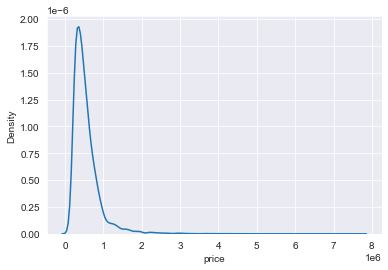

In [2363]:
sns.kdeplot(y_train)

In [2364]:
#take a log on price

y_train = np.log(y_train)
y_test = np.log(y_test)


<AxesSubplot:xlabel='price', ylabel='Density'>

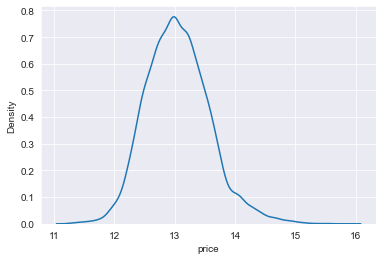

In [2365]:
sns.kdeplot(y_train)

In [2366]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 91 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  int64  
 7   view           16197 non-null  int64  
 8   condition      16197 non-null  int64  
 9   sqft_above     16197 non-null  int64  
 10  sqft_basement  16197 non-null  float64
 11  yr_built       16197 non-null  int64  
 12  yr_renovated   16197 non-null  float64
 13  zipcode        16197 non-null  int64  
 14  lat            16197 non-null  float64
 15  long           16197 non-null  float64
 16  sqft_living15  16197 non-null  int64  
 17  sqft_lot15     16197 non-null  int64  
 18  mon

In [2367]:
x_train.isnull().sum()

id             0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
              ..
x0_98177       0
x0_98178       0
x0_98188       0
x0_98198       0
x0_98199       0
Length: 91, dtype: int64

In [2368]:
#scale data w MinMaxScaler 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15 for both train n data set
features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
autoscaler = MinMaxScaler()

x_train[features] = autoscaler.fit_transform(x_train[features])
x_test[features] = autoscaler.fit_transform(x_test[features])

In [2369]:
x_train = x_train.drop(columns=['id','year','zipcode'])
x_test = x_test.drop(columns=['id','year','zipcode'])

In [2370]:
x_train.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6405          3       2.50     0.114655  0.002410     2.0           0     0   
937           3       2.50     0.125285  0.003661     1.0           0     0   
19076         5       4.00     0.330296  0.298645     2.0           0     0   
15201         2       2.00     0.080486  0.002035     1.0           0     0   
13083         3       2.25     0.144267  0.019137     1.0           0     0   

       condition  sqft_above  sqft_basement  ...  x0_98146  x0_98148  \
6405           2    0.167035       0.000000  ...       0.0       0.0   
937            2    0.103982       0.147303  ...       0.0       0.0   
19076          4    0.397124       0.157676  ...       0.0       0.0   
15201          3    0.117257       0.000000  ...       0.0       0.0   
13083          3    0.151549       0.109959  ...       0.0       0.0   

       x0_98155  x0_98166  x0_98168  x0_98177  x0_98178  x0_98188  x0_98198  \
6405        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
937         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
19076       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
15201       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
13083       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

       x0_98199  
6405        0.0  
937         0.0  
19076       0.0  
15201       0.0  
13083       0.0  

[5 rows x 88 columns]

In [2371]:
x_test.shape

(5400, 88)

In [2372]:
import statsmodels.api as sm
y = y_train
X= x_train
z = x_test
Hh = y_test
Xcont = sm.add_constant(X)

model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,Xcont)
res = model.fit()
#testmodel = sm.OLS(z,Hh).fit()
#print(testmodel.summary())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1203.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:27:06   Log-Likelihood:                 3696.3
No. Observations:               16197   AIC:                            -7217.
Df Residuals:                   16109   BIC:                            -6540.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -66.3703      8.095     -8.199

In [2373]:
#lr = LinearRegression()
#lr.fit(x_train,y_train)
ols = LinearRegression()

testsmodel = ols.fit(X,y)
print(testsmodel.score(X,y)) # train
print(testsmodel.score(z,Hh)) # test 
#print(cross_val_score(lr,X,y,cv=3))

0.8666296341435498
0.8250361486400566


In [2374]:
print(ols.intercept_)

-69.25598512448943


In [2375]:
ols.coef_

array([-9.72394302e-03,  5.00411177e-02,  1.89431294e+00,  1.07412021e+00,
       -3.12450085e-02,  4.70472758e-01,  7.36529504e-02,  5.78275346e-02,
        1.12123202e+00,  6.79991622e-02,  3.78423549e-04,  4.71092700e-05,
        6.05498923e-01, -4.25772636e-01,  7.37640527e-01,  3.23100772e-02,
       -4.86973514e-03,  5.55448820e-03, -4.57770957e-01, -2.45717527e-02,
        2.34665142e-02,  9.48680095e-01,  6.17797189e-01,  5.59708367e-01,
        5.58281745e-01,  5.44660185e-01,  3.08537689e-01,  2.04360662e-01,
        2.49220945e-01,  1.62890975e-01,  2.09334005e-01, -5.86700167e-02,
        4.03210561e-01,  4.72392513e-01,  1.51107699e-01,  5.86187046e-01,
        4.76270094e-02,  4.70318445e-02, -5.83036575e-02,  6.06570593e-01,
        3.23704584e-01,  2.05465710e-01,  1.07967563e+00,  7.51528100e-01,
        7.50012549e-02,  4.42350479e-01,  4.88212600e-01,  4.37720873e-01,
        7.18783154e-02,  2.20931306e-01,  1.29798462e-01,  2.62168908e-01,
        3.81866961e-01,  

In [2376]:
model1_predictions = ols.predict(x_test)

In [2377]:
model1_predictions

array([12.26145716, 13.15063008, 12.87243603, ..., 14.31865894,
       13.9704357 , 12.33347881])

In [2378]:
ols.score(x_test,y_test)

0.8250361486400566

In [2379]:
model1_predictions.shape


(5400,)

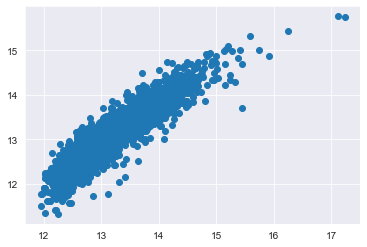

In [2380]:
plt.scatter(model1_predictions, y_test)

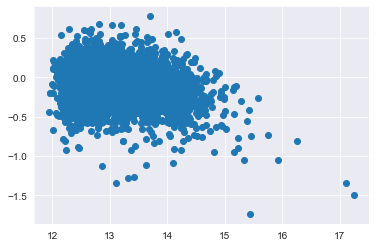

In [2381]:
plt.scatter(model1_predictions,(y_test-model1_predictions))

C:\Users\eggfr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

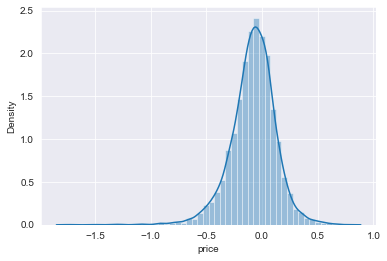

In [2382]:
sns.distplot((y_test-model1_predictions))

In [2383]:
metrics.mean_absolute_error(y_test,model1_predictions)

0.16109112693732267

In [2384]:
metrics.mean_squared_error(y_test,model1_predictions)

0.04804073278073668

In [2385]:
np.sqrt(mean_squared_error(y_test,model1_predictions))

0.2191819627175938

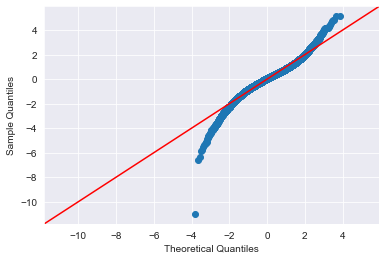

In [2386]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)

In [2387]:
#plt.scatter(model.predict(train[x_cols]), model.resid)
#plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

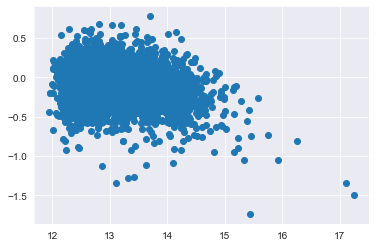

In [2388]:
plt.scatter(model1_predictions,(y_test-model1_predictions))

In [2389]:
#plt.scatter(res.predict(x_train), res.resid)
#plt.plot(res.predict(x_train), [0 for i in range(len(train))])

In [2390]:
x_train_list= list(x_train.columns.values)
print(x_train_list)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'seattle', 'x0_98002', 'x0_98003', 'x0_98004', 'x0_98005', 'x0_98006', 'x0_98007', 'x0_98008', 'x0_98010', 'x0_98011', 'x0_98014', 'x0_98019', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98027', 'x0_98028', 'x0_98029', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98033', 'x0_98034', 'x0_98038', 'x0_98039', 'x0_98040', 'x0_98042', 'x0_98045', 'x0_98052', 'x0_98053', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98059', 'x0_98065', 'x0_98070', 'x0_98072', 'x0_98074', 'x0_98075', 'x0_98077', 'x0_98092', 'x0_98102', 'x0_98103', 'x0_98105', 'x0_98106', 'x0_98107', 'x0_98108', 'x0_98109', 'x0_98112', 'x0_98115', 'x0_98116', 'x0_98117', 'x0_98118', 'x0_98119', 'x0_98122', 'x0_98125', 'x0_98126', 'x0_98133', 'x0_98136', 'x0_98144', 'x0_98146', 'x0_98148', 'x0_98155', 'x0_98166', 'x0_9816

In [2391]:
#perform vif_test
feature = x_train_list
X = x_train[feature]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_list = list(zip(feature, vif))
print(vif)

[1.770619497127088, 3.4639038658360635, 221.31481153053068, 2.070785442571235, 2.4758898335355024, 1.2509762837880845, 1.4839313065249025, 1.3131111654507046, 180.2283854888236, 50.37639939828327, 2.767679953514513, 1.1376877171621183, 63.88661991193275, 33.61583684427348, 3.110189183068628, 2.2463979016002606, 1.006950694078556, 1.2025010278832222, 21089662.863478556, 1.579479359842992, 1.7887938331765147, 6.481424811584746, 4.0521231084626095, 7.534653913977656, 3.5669133084076603, 6.61017296231003, 1.9338847847913445, 7.586865721254229, 6.397954790624942, 8.470979410880776, 3.175912664509184, 2.735491775580796, 3.048696849294018, 7.06239272622129, 10.46015572578633, 7.04350985146906, 1.9242313957847483, 2.3289855254731178, 1.4027780879829306, 11.279059899621732, 17.02039804620869, 5.491990642351125, 2.0080950866772236, 4.683904705922374, 3.7274706468007466, 7.59738700415196, 16.213050707692386, 12.488770114680115, 2.9466868708753844, 4.967628714117075, 4.085591645691739, 5.399965517

In [2392]:
vif_scores = list(zip(feature, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))
print((x_cols))

88 36
['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98039', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198']


In [2393]:
y = y_train
Hh = y_test
feature = x_cols
#feature = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98039', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198']
#feature = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month','new_grade']

X= x_train[feature]
z= x_test[feature]
Xcont = sm.add_constant(X)

model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,Xcont)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1001.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:27:18   Log-Likelihood:                -3123.8
No. Observations:               16197   AIC:                             6322.
Df Residuals:                   16160   BIC:                             6606.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.5795      0.218     85.252

In [2394]:
z.shape

(5400, 36)

In [2395]:
#lr2 = LinearRegression()
#lr2.fit(x_train,y_train)
ols2 = LinearRegression()
testsmodel = ols2.fit(X,y)
print(testsmodel.score(X,y)) # train
print(testsmodel.score(z,Hh)) # test

0.6904003161146838
0.6617858527333134


In [2396]:
print(ols2.intercept_)

18.579516598649597


In [2397]:
model2_predictions = ols2.predict(X)

In [2398]:
model2_predictions

array([13.19668624, 12.46247926, 13.94268975, ..., 12.8378732 ,
       12.04421236, 13.38492762])

In [2399]:
ols2.score(z,Hh)


0.6617858527333134

In [2400]:
model2_predictions = ols2.predict(z)

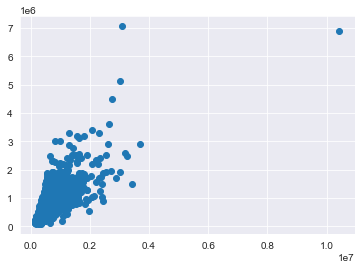

In [2401]:
plt.scatter(np.exp(model2_predictions), np.exp(y_test))

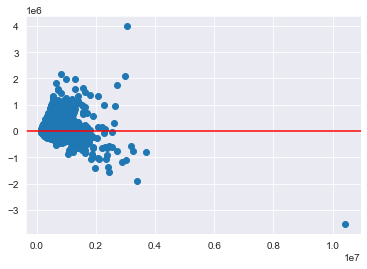

In [2402]:
plt.scatter(np.exp(model2_predictions),(np.exp(y_test)-np.exp(model2_predictions)))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("")
plt.show()

C:\Users\eggfr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

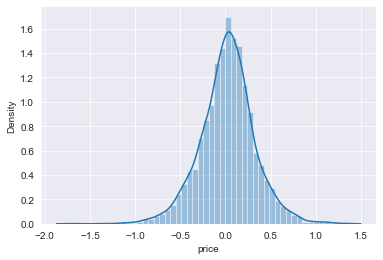

In [2403]:
sns.distplot((y_test-model2_predictions))

In [2404]:
metrics.mean_absolute_error(y_test,model2_predictions)

0.2296489783279661

In [2405]:
metrics.mean_squared_error(y_test,model2_predictions)

0.09286521384395792

In [2406]:
np.sqrt(mean_squared_error(y_test,model2_predictions))

0.304737942901697

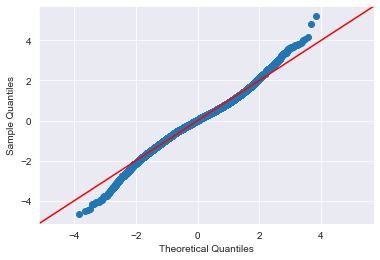

In [2407]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)

<AxesSubplot:>

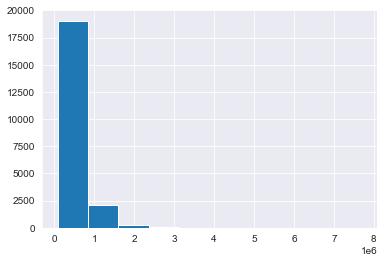

In [2408]:
project2_raw_df.price.hist()

In [2409]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, project2_raw_df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


In [2410]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, project2_raw_df['sqft_lot'].quantile(q=q)))

0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.71999999988
0.98 percentile: 107157.0


In [2411]:
#subset = y_test['price'] < 1600000]
#print(subset)

In [2412]:
#subset = project2_raw_df[project2_raw_df['price'] < 1600000]
#print('Percent removed:',(len(project2_raw_df) - len(subset))/len(project2_raw_df))
#outcome = 'price'
#x_cols = ['bedrooms','bathrooms','condition','view']
#predictors = '+'.join(x_cols)
#formula = outcome + '~' + predictors
#model = ols(formula=formula, data=subset).fit()
#model.summary()

In [2413]:
rem_project2_raw_df =project2_raw_df
rem_project2_raw_df.shape

(21597, 21)

In [2414]:
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['price']< 800000]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['bathrooms']< 6]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['bedrooms']< 6]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['sqft_living']< 4000]
rem_project2_raw_df = rem_project2_raw_df.loc[rem_project2_raw_df['sqft_lot']< 70000]
rem_project2_raw_df.shape

(17828, 21)

<AxesSubplot:>

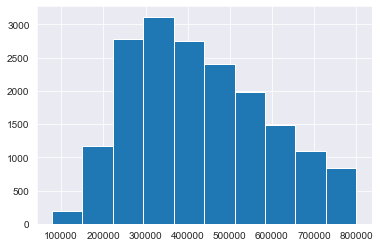

In [2415]:
rem_project2_raw_df.price.hist()

<AxesSubplot:>

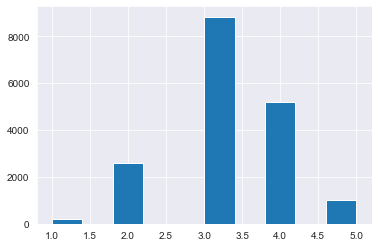

In [2416]:
rem_project2_raw_df.bedrooms.hist()

<AxesSubplot:>

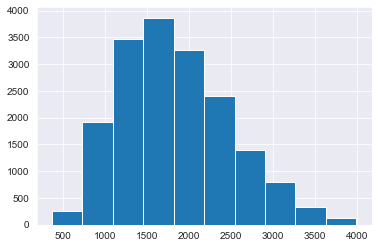

In [2417]:
rem_project2_raw_df.sqft_living.hist()

C:\Users\eggfr\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<AxesSubplot:>

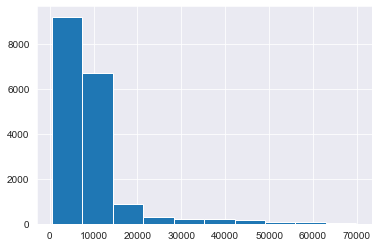

In [2418]:
rem_project2_raw_df.sqft_lot.hist()

In [2419]:
# X_train1 = x_train.copy()
# X_test1 = x_test.copy()
# y_train1 =y_train.copy()
# y_test1 = y_test.copy()

In [2420]:

rem_y = rem_project2_raw_df['price']
rem_X= rem_project2_raw_df.drop('price',1)
rem_X.shape

C:\Users\eggfr\AppData\Local\Temp\ipykernel_6552\3753446219.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rem_X= rem_project2_raw_df.drop('price',1)


(17828, 20)

In [2421]:
rem_y = rem_project2_raw_df['price']
rem_X= rem_project2_raw_df.drop('price',1)

C:\Users\eggfr\AppData\Local\Temp\ipykernel_6552\2040288294.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rem_X= rem_project2_raw_df.drop('price',1)


In [2422]:
#create train-test set using 75-25 (train-test and random state = 42) randomly split the data
x_train1, x_test1, y_train1, y_test1 = train_test_split(rem_X, rem_y ,test_size=0.25,random_state=42)
# shape of train and test splits
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((13371, 20), (4457, 20), (13371,), (4457,))

In [2423]:
rem_project2_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17828 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17828 non-null  int64  
 1   date           17828 non-null  object 
 2   price          17828 non-null  float64
 3   bedrooms       17828 non-null  int64  
 4   bathrooms      17828 non-null  float64
 5   sqft_living    17828 non-null  int64  
 6   sqft_lot       17828 non-null  int64  
 7   floors         17828 non-null  float64
 8   waterfront     15875 non-null  object 
 9   view           17778 non-null  object 
 10  condition      17828 non-null  object 
 11  grade          17828 non-null  object 
 12  sqft_above     17828 non-null  int64  
 13  sqft_basement  17828 non-null  object 
 14  yr_built       17828 non-null  int64  
 15  yr_renovated   14636 non-null  float64
 16  zipcode        17828 non-null  int64  
 17  lat            17828 non-null  float64
 18  long  

In [2424]:
rem_project2_raw_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1953
view               50
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3192
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [2425]:
rem_project2_raw_df.describe()

id          price      bedrooms    bathrooms   sqft_living  \
count  1.782800e+04   17828.000000  17828.000000  17828.00000  17828.000000   
mean   4.688273e+09  429387.851189      3.237548      1.96943   1836.757236   
std    2.867834e+09  159859.706360      0.806067      0.66120    651.402105   
min    1.200019e+06   78000.000000      1.000000      0.50000    370.000000   
25%    2.220069e+09  300000.000000      3.000000      1.50000   1340.000000   
50%    4.029950e+09  410000.000000      3.000000      2.00000   1760.000000   
75%    7.427850e+09  545000.000000      4.000000      2.50000   2250.000000   
max    9.900000e+09  799990.000000      5.000000      4.75000   3990.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  17828.000000  17828.000000  17828.000000  17828.000000  14636.000000   
mean    9177.740240      1.449349   1595.067254   1970.391126     62.263528   
std     8684.519688      0.537757    623.821962     28.940086    346.840477   
min      520.000000      1.000000    370.000000   1900.000000      0.000000   
25%     5000.000000      1.000000   1140.000000   1951.000000      0.000000   
50%     7332.500000      1.000000   1440.000000   1973.000000      0.000000   
75%     9760.000000      2.000000   1930.000000   1995.000000      0.000000   
max    69834.000000      3.500000   3950.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  17828.000000  17828.000000  17828.000000   17828.000000   17828.000000  
mean   98080.084081     47.552777   -122.218882    1831.703220    9117.524736  
std       53.678962      0.143374      0.140245     537.262015   11537.270442  
min    98001.000000     47.155900   -122.512000     399.000000     651.000000  
25%    98033.000000     47.450700   -122.333000    1440.000000    5000.000000  
50%    98070.000000     47.559100   -122.251000    1730.000000    7432.000000  
75%    98118.000000     47.681900   -122.133000    2160.000000    9501.500000  
max    98199.000000     47.777600   -121.315000    4440.000000  380279.000000

In [2426]:
x_train1['date'] = pd.to_datetime(x_train1['date'])
x_train1['month'] = x_train1['date'].apply(lambda date:date.month)
x_train1['year'] = x_train1['date'].apply(lambda date:date.year)
x_train1 = x_train1.drop('date',axis=1)

x_test1['date'] = pd.to_datetime(x_test1['date'])
x_test1['month'] = x_test1['date'].apply(lambda date:date.month)
x_test1['year'] = x_test1['date'].apply(lambda date:date.year)
x_test1 = x_test1.drop('date',axis=1)

#x_test['date'] = pd.to_datetime(x_test['date'])
#x_test['month'] = x_test['date'].apply(lambda date:date.month)
#x_test['year'] = x_test['date'].apply(lambda date:date.year)
#x_test = x_test.drop('date',axis=1)
# Check the new columns
print(x_train1.columns.values)

['id' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15' 'month' 'year']


In [2427]:
# change the inproper datatype for 'sqft_basement'
x_train1['sqft_basement'] = x_train1['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_train1['sqft_basement'] = x_train1['sqft_basement'].apply(lambda x: float(x))
#x_train['sqft_basement'].dtype
x_test1['sqft_basement'] = x_test1['sqft_basement'].apply(lambda x: float(x.replace("?", "297")))
x_test1['sqft_basement'] = x_test1['sqft_basement'].apply(lambda x: float(x))

In [2428]:
x_train1['waterfront'] = x_train1['waterfront'].fillna(value = 'NO')
x_train1['waterfront'] = x_train1['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
#x_train1['waterfront'].value_counts()
x_test1['waterfront'] = x_test1['waterfront'].fillna(value = 'NO')
x_test1['waterfront'] = x_test1['waterfront'].replace(to_replace = ['YES','NO'],value = [1,0])
#x_test1['waterfront'].value_counts()

In [2429]:
# fill na with no value -->majority is none and could be N/A as none as well. n change the catgorical ordinal in to 0 to 4 with 0 to none and 4 to excellent
x_train1['view'] = x_train1['view'].fillna(value = 'NONE')
x_test1['view'] = x_test1['view'].fillna(value = 'NONE')
x_train1['view'] = x_train1['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])
x_test1['view'] = x_test1['view'].replace(to_replace = ['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value = [0,1,2,3,4])

In [2430]:
# replace cateogrical rating with (0 to 5 scale. 0 - Poor, and 4 - Very Good)
x_train1['condition'] = x_train1['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])
x_test1['condition'] = x_test1['condition'].replace(to_replace = ['Poor','Fair','Average','Good','Very Good'],value = [0,1,2,3,4])


In [2431]:
# grab the numerical rating and assign it to interger type
x_train1['new_grade'] = x_train1['grade'].astype(str).str[0]
x_train1['new_grade'] = x_train1['new_grade'].astype(int)
x_test1['new_grade'] = x_test1['grade'].astype(str).str[0]
x_test1['new_grade'] = x_test1['new_grade'].astype(int)


In [2432]:
#drop the string grade column
x_train1 = x_train1.drop(columns='grade')
x_test1 = x_test1.drop(columns='grade')

In [2433]:
#grouping seattle into zipcode which it solely belongs https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033 
x_train1['seattle'] = x_train1['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 
x_test1['seattle'] = x_test1['zipcode'].apply(lambda x : 0 if x == 98101 or x == 98102 or x == 98103 or x == 98104 or x == 98105 or x == 98106 or x == 98107 or x == 98109 or x == 98111 or x == 98112 or x == 98114 or x == 98116 or x == 98117 or x == 98118 or x == 98119 or x == 98121 or x == 98122 or x == 98124 or x == 98125 or x == 98126 or x == 98131 or x == 98132 or x == 98133 or x == 98134 or x == 98136 or x == 98144 or x == 98145 or x == 98146 or x == 98148 or x == 98154  or x == 98160 or x == 98161 or x == 98164 or x == 98166 or x == 98171 or x == 98174 or x== 98178 or x == 98199 else 1) 


In [2434]:
#onehot Econdinf zipcode for x1_train
ohe = OneHotEncoder(drop='first')
data =  x_train1[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_train1.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_train1 = pd.concat([x_train1,view_df],axis=1)
x_train1.shape

C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(13371, 91)

In [2435]:
#onehot Econdinf zipcode for x_test
ohe = OneHotEncoder(drop='first')
data =  x_test1[['zipcode']]

view_df = pd.DataFrame(ohe.fit_transform(data).toarray(), index = x_test1.index) #index = x_train.index to match x_train index for concat later
view_df.columns = ohe.get_feature_names()   #use get_feature_names() to get feature name back after one hot encoding

x_test1 = pd.concat([x_test1,view_df],axis=1)



C:\Users\eggfr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [2436]:
# fillna with 0 to NaN for year_renovated- assuming there is no renovation.
x_train1['yr_renovated'] = x_train1['yr_renovated'].fillna(value = 0)
x_test1['yr_renovated'] = x_test1['yr_renovated'].fillna(value = 0)

In [2437]:
#take a log on price

y_train1 = np.log(y_train1)
y_test1 = np.log(y_test1)



In [2438]:
#scale data w MinMaxScaler 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15 for both train n data set
features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
autoscaler = MinMaxScaler()

x_train1[features] = autoscaler.fit_transform(x_train1[features])
x_test1[features] = autoscaler.fit_transform(x_test1[features])

In [2439]:
print(x_cols)

['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98039', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198']


In [2442]:

x_train1 = x_train1[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198']]
x_test1 = x_test1[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'month', 'new_grade', 'x0_98002', 'x0_98003', 'x0_98005', 'x0_98007', 'x0_98010', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98030', 'x0_98031', 'x0_98032', 'x0_98040', 'x0_98042', 'x0_98055', 'x0_98056', 'x0_98058', 'x0_98070', 'x0_98092', 'x0_98108', 'x0_98168', 'x0_98188', 'x0_98198']]

In [2443]:
x_test1.shape

(4457, 35)

In [2444]:
import statsmodels.api as sm
y = y_train1
X= x_train1
z = x_test1
Hh = y_test1
Xcont = sm.add_constant(X)

model = sm.OLS(endog = y, exog = Xcont)
model = sm.OLS(y,Xcont)
res = model.fit()
#testmodel = sm.OLS(z,Hh).fit()
#print(testmodel.summary())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     518.1
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:28:37   Log-Likelihood:                -876.72
No. Observations:               13371   AIC:                             1825.
Df Residuals:                   13335   BIC:                             2095.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.4134      0.224     77.908

In [2445]:
ols3 = LinearRegression()
testsmodel = ols3.fit(X,y)
print(testsmodel.score(X,y)) # train
print(testsmodel.score(z,Hh)) # test

0.5762444593622407
0.5811364548143889


In [2446]:
print(ols3.intercept_)

17.413352690259483


In [2447]:
model3_predictions = ols3.predict(z)

In [2448]:
model3_predictions

array([13.14518774, 13.12771941, 13.11453838, ..., 13.50343782,
       13.36611605, 12.68198886])

In [2449]:
ols3.score(z,Hh)

0.5811364548143889

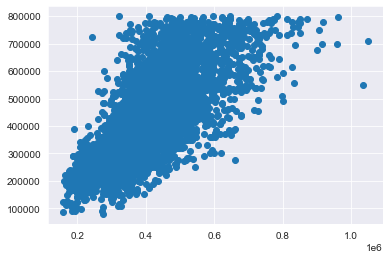

In [2450]:
plt.scatter(np.exp(model3_predictions), np.exp(y_test1))

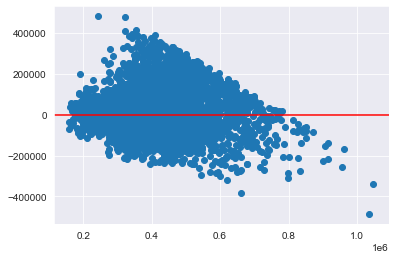

In [2451]:
plt.scatter(np.exp(model3_predictions),(np.exp(y_test1)-np.exp(model3_predictions)))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("")
plt.show()

C:\Users\eggfr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

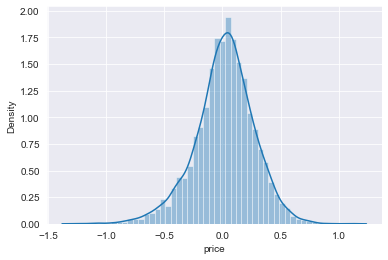

In [2453]:
sns.distplot((y_test1-model3_predictions))

In [2454]:
metrics.mean_absolute_error(y_test1,model3_predictions)

0.19560199187808283

In [2455]:
metrics.mean_squared_error(y_test1,model3_predictions)

0.06501198216423171

In [2456]:
np.sqrt(mean_squared_error(y_test1,model3_predictions))

0.2549744735541809

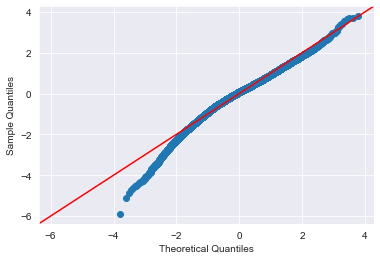

In [2457]:
fig = sm.graphics.qqplot(res.resid, dist=stats.norm, line='45', fit=True)